In [38]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [39]:
# from google.colab import files
# data = files.upload()

In [40]:
df = pd.read_excel("HairstyleDataset.xlsx")
df

,id_user,sex,hair_type,age,face_type,forehead_type,skin_color,is_glasses,hair_style,favourite_hair
0,1.0,men,curly,32.0,heart,m shape,black,yes,"Slick-back, Man Bun/Top Knot, Comma Hair, Mull...",Comma Hair
1,2.0,men,wavy,21.0,oval,straight,white,no,"Undercut, Comma Hair, Two Blocks, Curtain",Undercut
2,3.0,men,curly,21.0,oval,m shape,brown,no,"Side Part, Mullet",Buzz Cut
3,4.0,men,wavy,20.0,oval,straight,brown,yes,Undercut,Buzz Cut
4,5.0,men,wavy,21.0,oval,curve,brown,no,"Side Part, Caesar Cut, Two Blocks",Comma Hair
...,...,...,...,...,...,...,...,...,...,...
112,113.0,woman,straight,19.0,oval,wide,white,no,"Soft Bangs, Blunt Cut Bob, Low ponytail, Braid...",Long Curls
113,114.0,woman,straight,20.0,round,curve,white,no,"Low ponytail, Shaggy, Short Straight, Concave Bob",Short Straight
114,115.0,woman,wavy,20.0,round,narrow,brown,yes,Short Straight,Long Layered
115,116.0,woman,straight,21.0,round,curve,brown,yes,Invisible Layer,Long Layered


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_user         117 non-null    float64
 1   sex             117 non-null    object 
 2   hair_type       117 non-null    object 
 3   age             117 non-null    float64
 4   face_type       117 non-null    object 
 5   forehead_type   117 non-null    object 
 6   skin_color      117 non-null    object 
 7   is_glasses      117 non-null    object 
 8   hair_style      117 non-null    object 
 9   favourite_hair  116 non-null    object 
dtypes: float64(2), object(8)
memory usage: 9.3+ KB


In [42]:
null_values = df.isnull().sum()
null_values

id_user           0
sex               0
hair_type         0
age               0
face_type         0
forehead_type     0
skin_color        0
is_glasses        0
hair_style        0
favourite_hair    1
dtype: int64

In [43]:
df.drop(columns=["id_user"], inplace=True)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


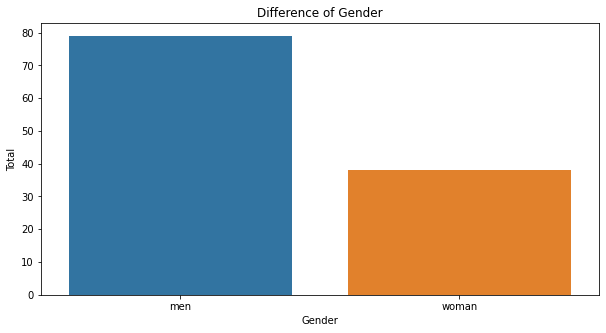

In [44]:
plt.subplots(figsize=(10,5))
sns.countplot(df['sex'].sort_values())
plt.xlabel('Gender')
plt.ylabel('Total')
plt.title('Difference of Gender')

plt.show()

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


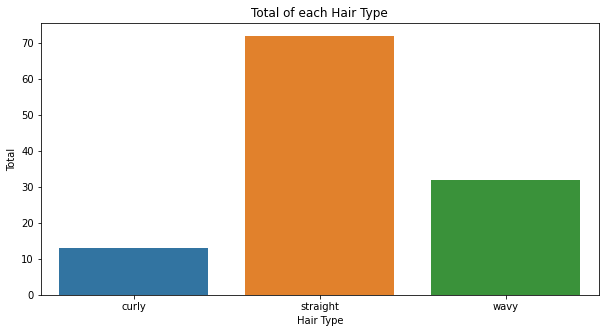

In [45]:
plt.subplots(figsize=(10,5))
sns.countplot(df['hair_type'].sort_values())
plt.xlabel('Hair Type')
plt.ylabel('Total')
plt.title('Total of each Hair Type')

plt.show()

In [46]:
age_based = pd.DataFrame(df.groupby('sex')['age'].mean())

age_based

,age
sex,
men,21.012658
woman,20.236842


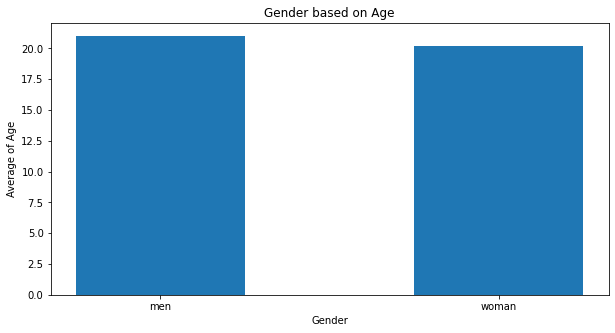

In [47]:
fig,ax = plt.subplots(figsize=(10,5))
ax.bar(age_based.index,age_based['age'],width=0.5)

plt.title('Gender based on Age')
ax.set_xlabel('Gender')
ax.set_ylabel('Average of Age')
plt.show()

In [48]:
df['hair_style'].index

RangeIndex(start=0, stop=117, step=1)

In [49]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

object_cols.remove('sex')
object_cols.remove('is_glasses')
object_cols.remove('hair_style')
object_cols.remove('favourite_hair')
ordinal_cols = ['sex', 'is_glasses']

print("Categorical variables:")
print(object_cols)

print("\n\nOrdinal variables:")
print(ordinal_cols)

Categorical variables:
['hair_type', 'face_type', 'forehead_type', 'skin_color']


Ordinal variables:
['sex', 'is_glasses']


In [50]:
# Make copy to avoid changing original data 
label_df = df.copy()

In [51]:
# Ordinal Encoder
ordinal_encoder = OrdinalEncoder()

df[ordinal_cols] = ordinal_encoder.fit_transform(df[ordinal_cols])

In [52]:
df

,sex,hair_type,age,face_type,forehead_type,skin_color,is_glasses,hair_style,favourite_hair
0,0.0,curly,32.0,heart,m shape,black,1.0,"Slick-back, Man Bun/Top Knot, Comma Hair, Mull...",Comma Hair
1,0.0,wavy,21.0,oval,straight,white,0.0,"Undercut, Comma Hair, Two Blocks, Curtain",Undercut
2,0.0,curly,21.0,oval,m shape,brown,0.0,"Side Part, Mullet",Buzz Cut
3,0.0,wavy,20.0,oval,straight,brown,1.0,Undercut,Buzz Cut
4,0.0,wavy,21.0,oval,curve,brown,0.0,"Side Part, Caesar Cut, Two Blocks",Comma Hair
...,...,...,...,...,...,...,...,...,...
112,1.0,straight,19.0,oval,wide,white,0.0,"Soft Bangs, Blunt Cut Bob, Low ponytail, Braid...",Long Curls
113,1.0,straight,20.0,round,curve,white,0.0,"Low ponytail, Shaggy, Short Straight, Concave Bob",Short Straight
114,1.0,wavy,20.0,round,narrow,brown,1.0,Short Straight,Long Layered
115,1.0,straight,21.0,round,curve,brown,1.0,Invisible Layer,Long Layered


In [53]:
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder

class OneHotEncoder(SklearnOneHotEncoder):
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False

    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out

    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns=new_columns, index=X.index)
        return d_out

    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)

    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}_<{self.categories_[i][j]}>')
                j += 1
        return new_columns

In [54]:
OH_encoder = OneHotEncoder()

OH_cols_df = OH_encoder.fit_transform(df[object_cols])


In [55]:
OH_cols_df

,hair_type_<curly>,hair_type_<straight>,hair_type_<wavy>,face_type_<heart>,face_type_<oval>,face_type_<round>,face_type_<square>,forehead_type_<curve>,forehead_type_<m shape>,forehead_type_<narrow>,forehead_type_<straight>,forehead_type_<wide>,skin_color_<black>,skin_color_<brown>,skin_color_<brown Tua>,skin_color_<light brown>,skin_color_<pale white>,skin_color_<white>
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
113,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
114,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
115,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [56]:
OH_cols_df.columns

Index(['hair_type_<curly>', 'hair_type_<straight>', 'hair_type_<wavy>',
       'face_type_<heart>', 'face_type_<oval>', 'face_type_<round>',
       'face_type_<square>', 'forehead_type_<curve>',
       'forehead_type_<m shape>', 'forehead_type_<narrow>',
       'forehead_type_<straight>', 'forehead_type_<wide>',
       'skin_color_<black>', 'skin_color_<brown>', 'skin_color_<brown Tua>',
       'skin_color_<light brown>', 'skin_color_<pale white>',
       'skin_color_<white>'],
      dtype='object')

In [57]:
# Drop the non OHEd Columns
df.drop(columns=object_cols, inplace=True)

In [58]:
# Add the OHEd Columns
df = pd.concat([df, OH_cols_df], axis=1)

In [59]:
df.drop(columns="favourite_hair", inplace=True)

In [60]:
df

,sex,age,is_glasses,hair_style,hair_type_<curly>,hair_type_<straight>,hair_type_<wavy>,face_type_<heart>,face_type_<oval>,face_type_<round>,...,forehead_type_<m shape>,forehead_type_<narrow>,forehead_type_<straight>,forehead_type_<wide>,skin_color_<black>,skin_color_<brown>,skin_color_<brown Tua>,skin_color_<light brown>,skin_color_<pale white>,skin_color_<white>
0,0.0,32.0,1.0,"Slick-back, Man Bun/Top Knot, Comma Hair, Mull...",1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,21.0,0.0,"Undercut, Comma Hair, Two Blocks, Curtain",0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,21.0,0.0,"Side Part, Mullet",1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,20.0,1.0,Undercut,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,21.0,0.0,"Side Part, Caesar Cut, Two Blocks",0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,1.0,19.0,0.0,"Soft Bangs, Blunt Cut Bob, Low ponytail, Braid...",0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
113,1.0,20.0,0.0,"Low ponytail, Shaggy, Short Straight, Concave Bob",0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
114,1.0,20.0,1.0,Short Straight,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
115,1.0,21.0,1.0,Invisible Layer,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [63]:
new_df = df.copy()

In [66]:
# get first row by index
new_df.iloc[0]

0.0

In [61]:
df['hair_style'].map(lambda x: new_df.concat(pd.DataFrame(new_df.iloc[0])) for index, style in enumerate(x.split(', ')))

0      [Slick-back, Man Bun/Top Knot, Comma Hair, Mul...
1            [Undercut, Comma Hair, Two Blocks, Curtain]
2                                    [Side Part, Mullet]
3                                             [Undercut]
4                    [Side Part, Caesar Cut, Two Blocks]
                             ...                        
112    [Soft Bangs, Blunt Cut Bob, Low ponytail, Brai...
113    [Low ponytail, Shaggy, Short Straight, Concave...
114                                     [Short Straight]
115                                    [Invisible Layer]
116                         [Soft Bangs, Short Straight]
Name: hair_style, Length: 117, dtype: object